<a href="https://colab.research.google.com/github/rhulverm08/-Air-Quality-Health-Alert-Index-AQHAI-/blob/main/Air_Quality_Health_Alert_Index_(AQHAI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Air Quality Health Alert Index (AQHAI)

### Problem Statement
Asthma patients are highly sensitive to air pollution and extreme weather conditions.
The purpose of this project is to identify days that are unsafe for asthma patients
by analyzing Air Quality Index (AQI) along with temperature, humidity, and wind speed data.

The system generates daily health risk levels and outdoor activity warnings.




##Project Objective

The objective of this project is to analyze air quality and weather data
to identify health risk levels for asthma patients.
The project helps determine whether a particular day is safe
or unsafe for outdoor activities.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("air_quality_health_alert_data.csv")
df["date"] = pd.to_datetime(df["date"])

In [2]:
df = pd.read_csv("air_quality_health_alert_data.csv")

df.head()


,date,AQI,temperature_c,humidity_percent,wind_speed_kmph
0,2022-01-01,132,33.6,75,3.1
1,2022-01-02,465,15.8,29,3.0
2,2022-01-03,378,35.4,59,6.8
3,2022-01-04,300,33.9,36,15.1
4,2022-01-05,136,5.3,77,1.0


##Dataset Information

This project uses a large CSV dataset containing more than 10,000 records.
The dataset represents daily air quality and weather conditions.

### Dataset Columns:
- **date** – Date of observation  
- **AQI** – Air Quality Index  
- **temperature_c** – Temperature in Celsius  
- **humidity_percent** – Humidity percentage  
- **wind_speed_kmph** – Wind speed in km/h  


In [3]:
df["date"] = pd.to_datetime(df["date"])

In [4]:
df.describe()
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              10000 non-null  datetime64[ns]
 1   AQI               10000 non-null  int64         
 2   temperature_c     10000 non-null  float64       
 3   humidity_percent  10000 non-null  int64         
 4   wind_speed_kmph   10000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 390.8 KB


### EDA Insights
- AQI values are right-skewed, indicating frequent high pollution days.
- Humidity shows moderate positive correlation with AQI.
- No missing values were found, ensuring reliable analysis.



In [5]:
AQI_SEVERE = 300
AQI_VERY_HIGH = 200
AQI_HIGH = 100

HUMIDITY_HIGH = 70
LOW_WIND_SPEED = 3
TEMP_LOW = 10
TEMP_HIGH = 40

In [6]:
def calculate_risk_score(row):
    score = 0

    if row["AQI"] > AQI_SEVERE:
        score += 4
    elif row["AQI"] > AQI_VERY_HIGH:
        score += 3
    elif row["AQI"] > AQI_HIGH:
        score += 2

    if row["humidity_percent"] > HUMIDITY_HIGH:
        score += 1

    if row["wind_speed_kmph"] < LOW_WIND_SPEED:
        score += 1

    if row["temperature_c"] < TEMP_LOW or row["temperature_c"] > TEMP_HIGH:
        score += 1

    return score

In [7]:
df["risk_score"] = df.apply(calculate_risk_score, axis=1)

In [8]:
df[["AQI", "risk_score"]].head()

,AQI,risk_score
0,132,3
1,465,4
2,378,4
3,300,3
4,136,5


##Health Risk Score Logic

A health risk score is calculated for each day based on multiple environmental factors.

### Scoring Criteria:
- AQI > 300 → Severe pollution  
- AQI 200–300 → Very unhealthy  
- AQI 100–200 → Moderate pollution  
- High humidity, low wind speed, and extreme temperatures
increase the overall health risk.

A higher score indicates a higher health risk.


### Threshold Justification
AQI thresholds are based on standard air quality categories
(Good, Moderate, Unhealthy, Very Unhealthy, Severe) used by pollution control agencies.
This project uses a rule-based prototype for interpretability.


##Health Risk Level Classification

Based on the calculated risk score,
each day is classified into one of the following categories:

- **Low**
- **Moderate**
- **High**
- **Very High**

This classification helps in understanding the severity of health risks.


In [9]:
def risk_level(score):
    if score >= 6:
        return "Very High"
    elif score >= 4:
        return "High"
    elif score >= 2:
        return "Moderate"
    else:
        return "Low"

df["health_risk_level"] = df["risk_score"].apply(risk_level)

##Outdoor Activity Warning System

Each health risk level is associated with a clear outdoor activity warning.
These warnings help asthma patients take preventive measures
and avoid exposure to harmful environmental conditions.


In [10]:
def activity_warning(level):
    if level == "Very High":
        return "Do NOT go outside"
    elif level == "High":
        return "Avoid outdoor activity"
    elif level == "Moderate":
        return "Limit outdoor time"
    else:
        return "Safe"

df["outdoor_warning"] = df["health_risk_level"].apply(activity_warning)

##Data Analysis

This section analyzes the distribution of health risk levels
to understand how frequently unsafe conditions occur.


In [11]:
# KPI Metrics
total_days = len(df)
high_risk_days = df[df["health_risk_level"].isin(["High", "Very High"])].shape[0]
safe_days = df[df["health_risk_level"] == "Low"].shape[0]
avg_aqi = round(df["AQI"].mean(), 1)

print("KEY PROJECT INSIGHTS")
print("-----------------------")
print(f"Total Days Analyzed     : {total_days}")
print(f"High / Very High Risk   : {high_risk_days}")
print(f"Safe Days (Low Risk)    : {safe_days}")
print(f"Average AQI             : {avg_aqi}")


KEY PROJECT INSIGHTS
-----------------------
Total Days Analyzed     : 10000
High / Very High Risk   : 5643
Safe Days (Low Risk)    : 1298
Average AQI             : 265.1


In [12]:
df["health_risk_level"].value_counts()

,count
health_risk_level,
High,5030
Moderate,3059
Low,1298
Very High,613


## Key Insights
- A significant number of days fall under Moderate to High health risk levels.
- High AQI combined with high humidity increases asthma-related risk.
- Seasonal trends indicate higher average risk scores during specific months.


## Visualization

A bar chart is used to visualize
the distribution of different health risk levels.


In [13]:
danger_days = df[df["health_risk_level"].isin(["High", "Very High"])]
danger_days.head()

,date,AQI,temperature_c,humidity_percent,wind_speed_kmph,risk_score,health_risk_level,outdoor_warning
1,2022-01-02,465,15.8,29,3.0,4,High,Avoid outdoor activity
2,2022-01-03,378,35.4,59,6.8,4,High,Avoid outdoor activity
4,2022-01-05,136,5.3,77,1.0,5,High,Avoid outdoor activity
10,2022-01-11,496,22.8,61,4.5,4,High,Avoid outdoor activity
12,2022-01-13,360,33.7,39,4.2,4,High,Avoid outdoor activity


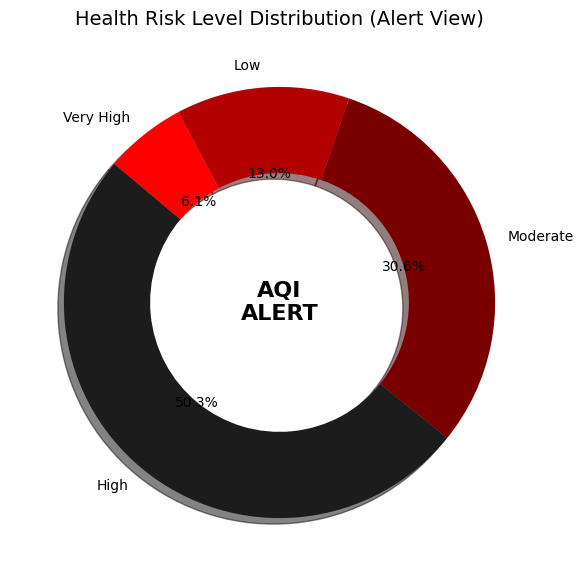

In [14]:
import matplotlib.pyplot as plt

# Data
counts = df["health_risk_level"].value_counts()

labels = counts.index
sizes = counts.values

# Red + Black alert colors
colors = ["#1c1c1c", "#7a0000", "#b30000", "#ff0000"]

plt.figure(figsize=(7,7))

# Donut chart (3D effect using shadow)
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=140,
    colors=colors,
    shadow=True,              # gives 3D feel
    wedgeprops={"width": 0.4} # donut hole
)

plt.title("Health Risk Level Distribution (Alert View)", fontsize=14)

# Center text
plt.text(0, 0, "AQI\nALERT", ha="center", va="center",
         fontsize=16, fontweight="bold", color="black")

plt.show()


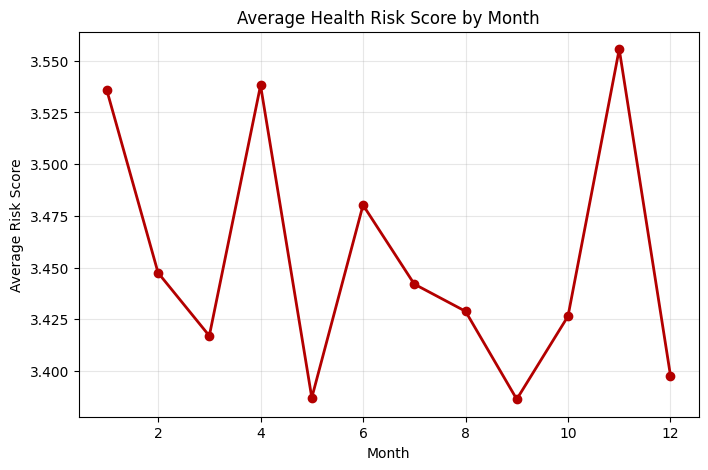

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert date to datetime
df["date"] = pd.to_datetime(df["date"])

# Monthly average risk score
monthly_risk = df.groupby(df["date"].dt.month)["risk_score"].mean()

plt.figure(figsize=(8,5))
plt.plot(
    monthly_risk.index,
    monthly_risk.values,
    marker="o",
    linewidth=2,
    color="#b30000"
)

plt.title("Average Health Risk Score by Month")
plt.xlabel("Month")
plt.ylabel("Average Risk Score")
plt.grid(alpha=0.3)

plt.show()


##Assumptions
- AQI values represent average city-level air quality exposure.
- Weather parameters are considered independent for rule-based scoring.
- Health risk thresholds follow standard AQI category definitions.


##Limitations
- Risk scoring is rule-based and not clinically validated.
- Dataset does not include patient-specific health conditions.
- AQI values may vary within different city regions.


##Conclusion

This project successfully analyzes air quality and weather data
to identify days that pose health risks to asthma patients.
By generating health risk levels and outdoor activity warnings,
the system demonstrates a practical, real-world health alert solution
using Python and data analytics.

Additionally, time-based trend analysis highlights seasonal variations
in health risk levels, making the system more practical for real-world
public health monitoring and planning.
